<a href="https://colab.research.google.com/github/PothabattiniNagasathvika/AIML-PROJECT-2320030166/blob/main/AIML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#bfs

from collections import defaultdict

class Graph:

    def __init__(self):

        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def BFS(self, s):

        visited = [False] * (max(self.graph) + 1)

        queue = []

        queue.append(s)
        visited[s] = True

        while queue:

            s = queue.pop(0)
            print(s, end=" ")

            for i in self.graph[s]:
                if not visited[i]:
                    queue.append(i)
                    visited[i] = True
if __name__ == '__main__':

    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    print("Following is Breadth First Traversal"
        " (starting from vertex 2)")
    g.BFS(2)


Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 

In [2]:
from collections import defaultdict


class Graph:


    def __init__(self):


        self.graph = defaultdict(list)



    def addEdge(self, u, v):
        self.graph[u].append(v)


    def DFSUtil(self, v, visited):


        visited.add(v)
        print(v, end=' ')


        for neighbour in self.graph[v]:
            if neighbour not in visited:
                self.DFSUtil(neighbour, visited)



    def DFS(self, v):

        visited = set()


        self.DFSUtil(v, visited)


if __name__ == "__main__":
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    print("Following is Depth First Traversal (starting from vertex 2)")

    g.DFS(2)


Following is Depth First Traversal (starting from vertex 2)
2 0 1 3 

In [3]:
#dfs
class Graph:
    def __init__(self, edges):
        self.graph = {}
        for (u, v) in edges:
            if u in self.graph:
                self.graph[u].append(v)
            else:
                self.graph[u] = [v]


    def dfs(self, src, target, max_depth):
        if src == target:
            return True
        if max_depth <= 0:
            return False


        for neighbor in self.graph.get(src, []):
            if self.dfs(neighbor, target, max_depth - 1):
                return True
        return False


    def iddfs(self, src, target, max_depth):
        for depth in range(max_depth):
            if self.dfs(src, target, depth):
                return True
        return False



edges = [
    (0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6),
    (3, 7), (4, 8), (5, 9), (6, 10)
]

g = Graph(edges)

src = 0
target = 9
max_depth = 4

if g.iddfs(src, target, max_depth):
    print(f"Target {target} found within depth {max_depth}")
else:
    print(f"Target {target} not found within depth {max_depth}")


Target 9 found within depth 4


In [5]:
import random
from datetime import datetime, timedelta

def random_date(start, end):
    # Get the time difference between the start and end
    time_between = end - start
    # Generate a random duration within that range
    random_duration = random.randrange(time_between.total_seconds())
    # Return the random date by adding the random duration to the start date
    return start + timedelta(seconds=random_duration)

# Example usage
start_date = datetime(2020, 1, 1, 0, 0, 0)  # Starting point (1st Jan 2020)
end_date = datetime(2023, 12, 31, 23, 59, 59)  # Ending point (31st Dec 2023)

random_moment = random_date(start_date, end_date)
print("Random Date and Time:", random_moment)


Random Date and Time: 2020-02-06 21:22:20


<ipython-input-5-b297e21a5329>:8: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  random_duration = random.randrange(time_between.total_seconds())


In [8]:

from queue import PriorityQueue

# Heuristic function: Manhattan distance
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm
def a_star(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    open_set = PriorityQueue()
    open_set.put((0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Goal reached
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        # Neighbors of the current node
        for d in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No path found

# Example grid (0 = passable, 1 = obstacle)
grid = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0]
]

# Start and goal positions
start = (0, 0)
goal = (4, 5)

# Run A* algorithm
path = a_star(start, goal, grid)

# Print the result
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5)]


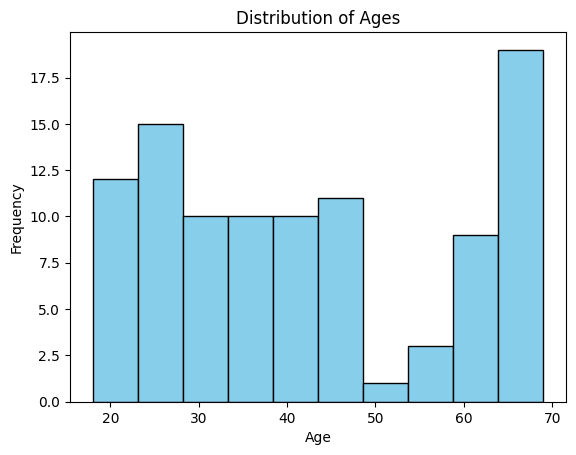

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Ages
ages = np.random.randint(18, 70, size=100)  # Generating random ages for example

# Create a histogram
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

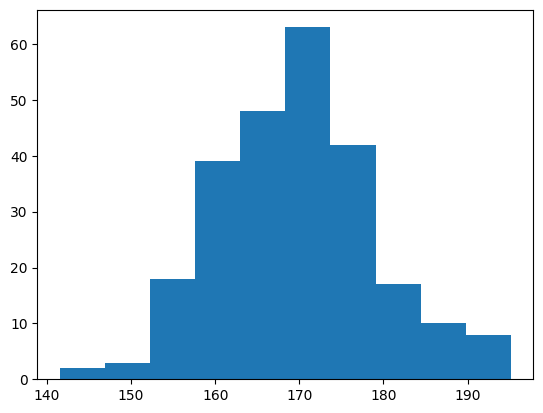

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()